In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from tqdm import trange
import os
import matplotlib.pyplot as plt

os.environ['USE_AUTH_EPHEM'] = '0'

from google.colab import auth
auth.authenticate_user()

In [2]:
%%bigquery output --project alert-ground-261008
SELECT month, year, lon, lat, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.1998_2015_withtimes
WHERE lon>119 AND lon<284 AND lat>-40 AND lat<40
GROUP BY month, year, lon, lat
ORDER BY month, year

Query is running:   0%|          |

Downloading:   0%|          |

In [3]:
output['date'] = pd.to_datetime(output[['year', 'month']].assign(DAY=1))

In [4]:
output = output[['date', 'lat', 'lon', 'mean_sst']].set_index(['date', 'lat', 'lon']).to_xarray().mean_sst

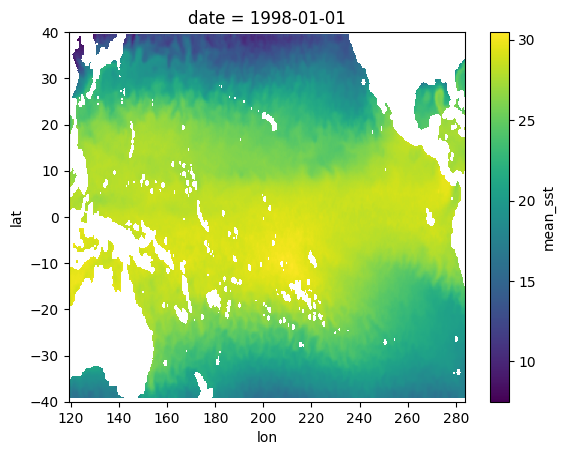

In [6]:
output.isel(date=0).plot()

In [10]:
data = output.values

In [15]:
data = np.array([data[i].ravel() for i in range(len(data))])

In [17]:
data.shape

(217, 211200)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=10)

In [29]:
data_nonan = np.array([data[i][~np.isnan(data[0])] for i in range(len(data))])

In [30]:
pca.fit(data_nonan)

PCA(n_components=10)

In [31]:
Xpca = pca.transform(data_nonan)

In [41]:
pcacomp = pca.components_

In [42]:
pcacomp.shape

(10, 169475)

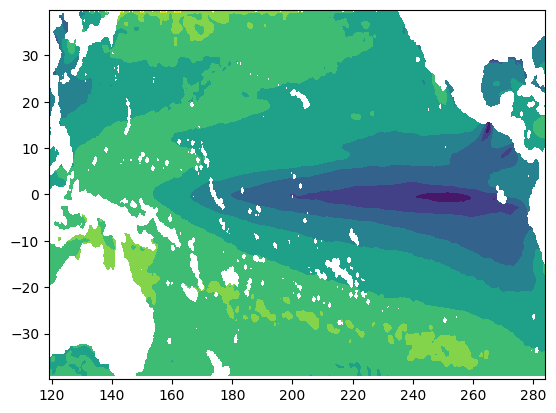

In [61]:
component_used = 1

pattern = data[0].copy()
pattern[~np.isnan(data[0])] = pcacomp[component_used]
pattern = pattern.reshape(output.values[0].shape)

plt.contourf(output.lon, output.lat, pattern)